## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-v0_8-bright')
from ipywidgets import widgets
import ast
from vr_app_functions import plot_target_contour, DownstreamProcess, response_surface
from IPython.display import Markdown
from importlib import reload
import vr_app_functions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


process_parameters = {}

# Import Process Conditions from Excel
products = ['pdna', 'mab', 'fragment']

data = {}
for product in products:
    data[product] = pd.read_excel('data/process_conditions.xlsx', sheet_name=product, header=0, index_col=[0, 1])

processes, targets = {}, {}
for product in products:
    processes[product] = data[product].index.get_level_values(0).unique().to_list()
    targets[product] = data[product].index.get_level_values(1).unique().to_list()


# Import Initial Conditions from Excel
initial_conditions = {}
for product in products:
    initial_conditions[product] = pd.read_excel('data/initial_conditions.xlsx', sheet_name=product, header=0, index_col=None)


## Choose Product 

In [2]:
style = {'description_width': 'initial'}
selected_product =widgets.Dropdown(
    options=products,
    value=products[0],
    description='Product Options:',
    disabled=False,
    style=style
)
display(selected_product)

Dropdown(description='Product Options:', options=('pdna', 'mab', 'fragment'), style=DescriptionStyle(descripti…

## Set Initial Conditions

In [3]:
style = {'description_width': 'initial'}
initial_conditions_widget = {}

for target in initial_conditions[selected_product.value]['Variable'].to_list():#targets[selected_product.value] + ['Product concentration']:
    initial_conditions_widget[target] = widgets.FloatText(
        value=initial_conditions[selected_product.value].loc[initial_conditions[selected_product.value]['Variable'] == target]['Value'].to_numpy(),
        description='Initial ' + target,
        disabled=False,
        style=style
    )
    display(initial_conditions_widget[target])


FloatText(value=1.0, description='Initial Product concentration', style=DescriptionStyle(description_width='in…

FloatText(value=7.5, description='Initial Host cell protein concentration', style=DescriptionStyle(description…

FloatText(value=3.0, description='Initial Host cell RNA concentration', style=DescriptionStyle(description_wid…

FloatText(value=500.0, description='Initial Volume', style=DescriptionStyle(description_width='initial'))

FloatText(value=1.0, description='Initial Yield', style=DescriptionStyle(description_width='initial'))

## Choose Process conditions

### Process conditions - AL

FloatSlider(value=0.17700159733345133, continuous_update=False, description='NaOH concentration / M', layout=L…

FloatSlider(value=56.18471904013171, continuous_update=False, description='Incubation time / s', layout=Layout…

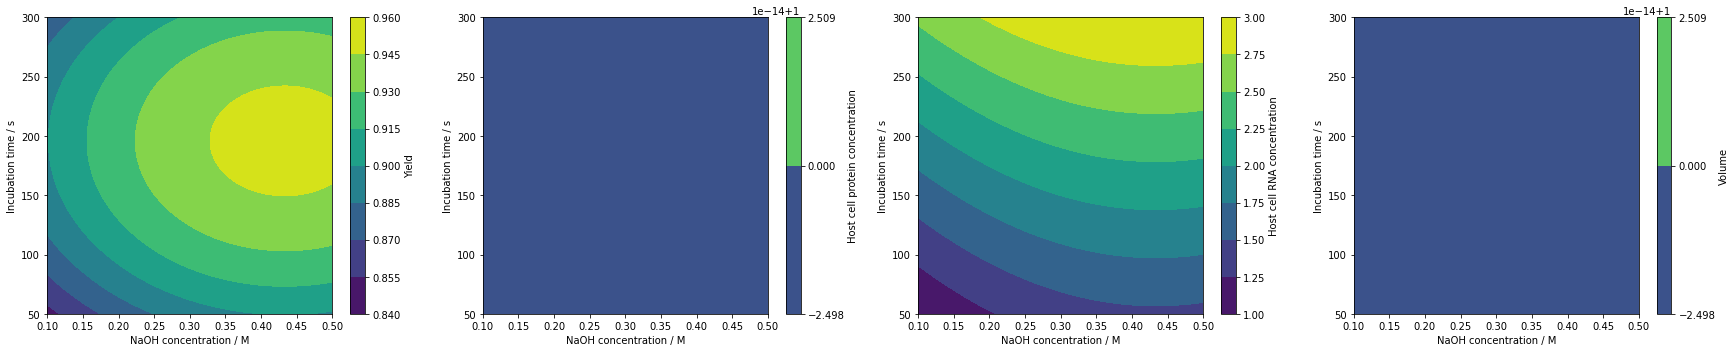

In [60]:
slider_resolution = 100
product = selected_product.value

process = processes[product][0]
temp = data[product].loc[process]

x_min, x_max = ast.literal_eval(temp['x'][0])
y_min, y_max = ast.literal_eval(temp['y'][0])

process_parameters[process] = {}
process_parameters[process][temp['x_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(x_min, x_max),
    min=x_min,
    max=x_max,
    step = (x_max - x_min) / slider_resolution,
    description=temp['x_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

process_parameters[process][temp['y_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(y_min, y_max),
    min=y_min,
    max=y_max,
    step = (y_max - y_min) / slider_resolution,
    description=temp['y_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

display(Markdown('### Process conditions - ' + process))

display(process_parameters[process][temp['x_name'][0]])
display(process_parameters[process][temp['y_name'][0]])

fig = plt.figure(figsize=(30, 5))

for j, target in enumerate(targets[product]):
    x_range = np.linspace(ast.literal_eval(temp['x'][0])[0], ast.literal_eval(temp['x'][0])[1], 100)
    y_range = np.linspace(ast.literal_eval(temp['y'][0])[0], ast.literal_eval(temp['y'][0])[1], 100)
    coef = ast.literal_eval(temp.loc[target]['coef'])
    scale = temp.loc[target]['scale_xy']
    target_range = temp.loc[target]['target_range']
    if isinstance(target_range, type(np.nan)):
        target_range = None
    else:
        target_range = ast.literal_eval(temp.loc[target]['target_range'])
    x, y, z, _  = response_surface(x_range, y_range, coef, scale=scale, target_range=target_range)

    ax = fig.add_subplot(1, 5, j+1)
    plot_target_contour(x, y, z, xlabel=temp['x_name'][0], ylabel=temp['y_name'][0], zlabel=target, ax=ax)
    # ax.scatter(process_parameters[process][temp['x_name'][0]].value, process_parameters[process][temp['y_name'][0]].value, marker='*', c='r', s=100)
fig.tight_layout()

### Process conditions - DF

FloatSlider(value=95.40543128652345, continuous_update=False, description='Membrane flux / $L/m^2/h$', layout=…

FloatSlider(value=152.14639941432472, continuous_update=False, description='Volumetric loading / $L/m^2$', lay…

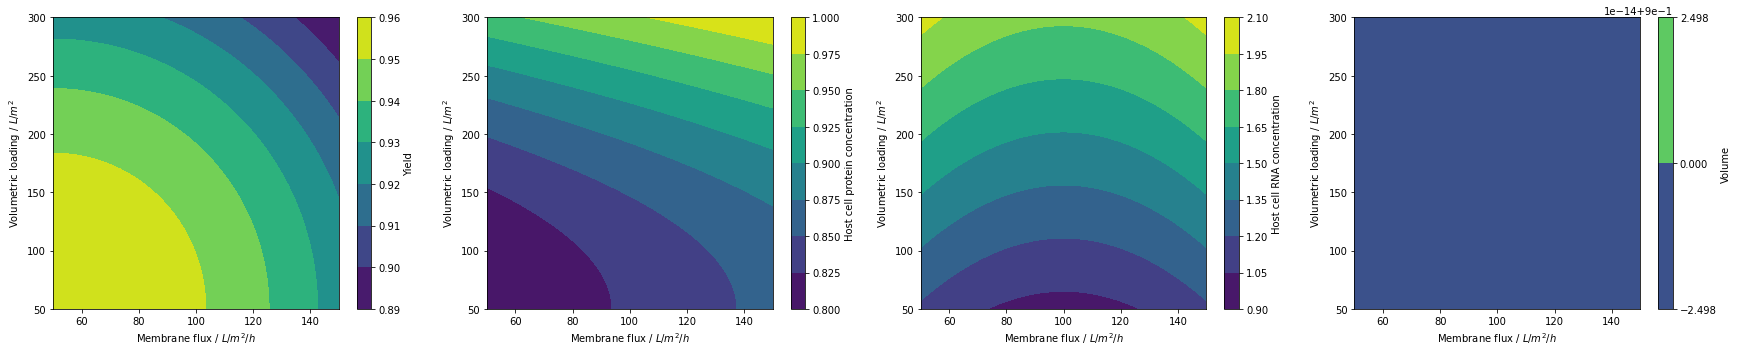

In [61]:
import numpy as np
slider_resolution = 100
product = selected_product.value

process = processes[product][1]
temp = data[product].loc[process]

x_min, x_max = ast.literal_eval(temp['x'][0])
y_min, y_max = ast.literal_eval(temp['y'][0])

process_parameters[process] = {}
process_parameters[process][temp['x_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(x_min, x_max),
    min=x_min,
    max=x_max,
    step = (x_max - x_min) / slider_resolution,
    description=temp['x_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

process_parameters[process][temp['y_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(y_min, y_max),
    min=y_min,
    max=y_max,
    step = (y_max - y_min) / slider_resolution,
    description=temp['y_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

display(Markdown('### Process conditions - ' + process))

display(process_parameters[process][temp['x_name'][0]])
display(process_parameters[process][temp['y_name'][0]])

fig = plt.figure(figsize=(30, 5))

for j, target in enumerate(targets[product]):
    x_range = np.linspace(ast.literal_eval(temp['x'][0])[0], ast.literal_eval(temp['x'][0])[1], 100)
    y_range = np.linspace(ast.literal_eval(temp['y'][0])[0], ast.literal_eval(temp['y'][0])[1], 100)
    coef = ast.literal_eval(temp.loc[target]['coef'])
    scale = temp.loc[target]['scale_xy']
    target_range = temp.loc[target]['target_range']
    if isinstance(target_range, type(np.nan)):
        target_range = None
    else:
        target_range = ast.literal_eval(temp.loc[target]['target_range'])
    x, y, z, _  = response_surface(x_range, y_range, coef, scale=scale, target_range=target_range)

    ax = fig.add_subplot(1, 5, j+1)
    plot_target_contour(x, y, z, xlabel=temp['x_name'][0], ylabel=temp['y_name'][0], zlabel=target, ax=ax)
    # ax.scatter(process_parameters[process][temp['x_name'][0]].value, process_parameters[process][temp['y_name'][0]].value, marker='*', c='r', s=100)
fig.tight_layout()

### Process conditions - aex

FloatSlider(value=0.9561837631757542, continuous_update=False, description='Salt concentration (Elution) / M',…

FloatSlider(value=3.620384255336111, continuous_update=False, description='Product loading / g/L', layout=Layo…

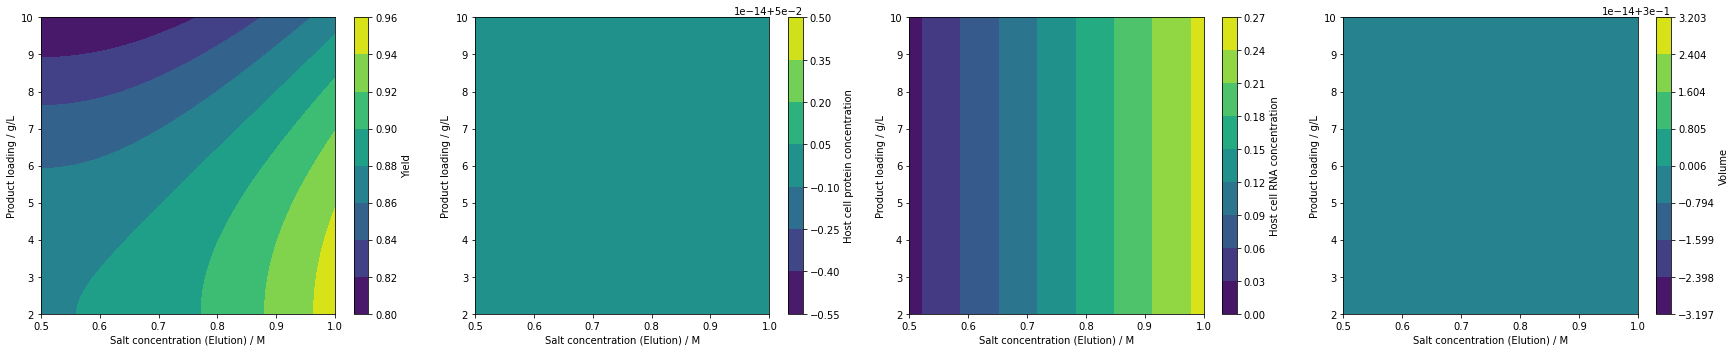

In [62]:
import numpy as np
slider_resolution = 100
product = selected_product.value

process = processes[product][2]
temp = data[product].loc[process]

x_min, x_max = ast.literal_eval(temp['x'][0])
y_min, y_max = ast.literal_eval(temp['y'][0])

process_parameters[process] = {}
process_parameters[process][temp['x_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(x_min, x_max),
    min=x_min,
    max=x_max,
    step = (x_max - x_min) / slider_resolution,
    description=temp['x_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

process_parameters[process][temp['y_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(y_min, y_max),
    min=y_min,
    max=y_max,
    step = (y_max - y_min) / slider_resolution,
    description=temp['y_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

display(Markdown('### Process conditions - ' + process))

display(process_parameters[process][temp['x_name'][0]])
display(process_parameters[process][temp['y_name'][0]])

fig = plt.figure(figsize=(30, 5))

for j, target in enumerate(targets[product]):
    x_range = np.linspace(ast.literal_eval(temp['x'][0])[0], ast.literal_eval(temp['x'][0])[1], 100)
    y_range = np.linspace(ast.literal_eval(temp['y'][0])[0], ast.literal_eval(temp['y'][0])[1], 100)
    coef = ast.literal_eval(temp.loc[target]['coef'])
    scale = temp.loc[target]['scale_xy']
    target_range = temp.loc[target]['target_range']
    if isinstance(target_range, type(np.nan)):
        target_range = None
    else:
        target_range = ast.literal_eval(temp.loc[target]['target_range'])
    x, y, z, _  = response_surface(x_range, y_range, coef, scale=scale, target_range=target_range)

    ax = fig.add_subplot(1, 5, j+1)
    plot_target_contour(x, y, z, xlabel=temp['x_name'][0], ylabel=temp['y_name'][0], zlabel=target, ax=ax)
    # ax.scatter(process_parameters[process][temp['x_name'][0]].value, process_parameters[process][temp['y_name'][0]].value, marker='*', c='r', s=100)
fig.tight_layout()

### Process conditions - hic

FloatSlider(value=2.600315793578656, continuous_update=False, description='Ammoniumsulfate concentration / M',…

FloatSlider(value=1.4302073274802132, continuous_update=False, description='Product loading / g/L', layout=Lay…

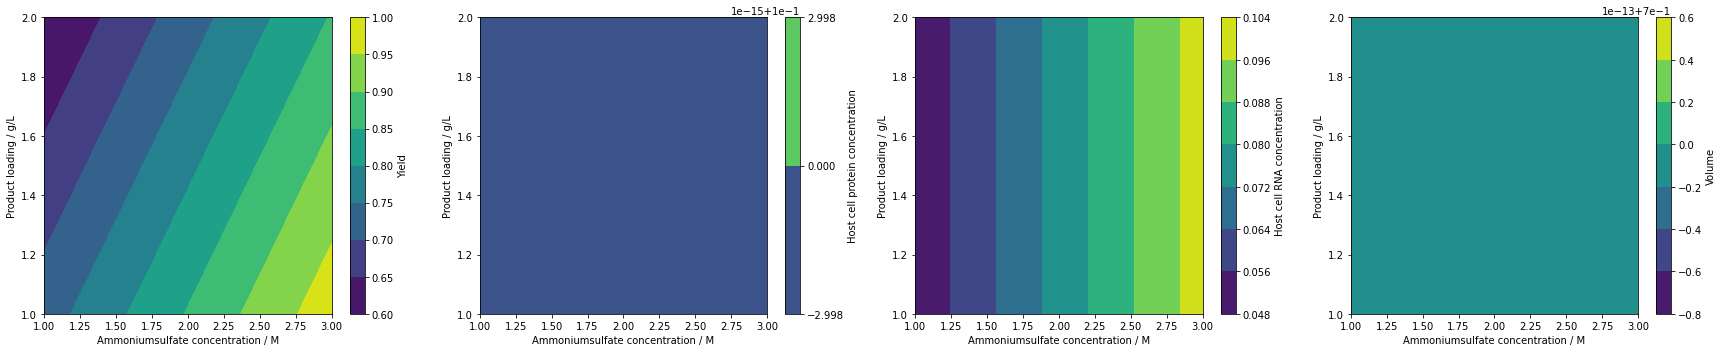

In [63]:
import numpy as np
slider_resolution = 100
product = selected_product.value

process = processes[product][3]
temp = data[product].loc[process]

x_min, x_max = ast.literal_eval(temp['x'][0])
y_min, y_max = ast.literal_eval(temp['y'][0])

process_parameters[process] = {}
process_parameters[process][temp['x_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(x_min, x_max),
    min=x_min,
    max=x_max,
    step = (x_max - x_min) / slider_resolution,
    description=temp['x_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

process_parameters[process][temp['y_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(y_min, y_max),
    min=y_min,
    max=y_max,
    step = (y_max - y_min) / slider_resolution,
    description=temp['y_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

display(Markdown('### Process conditions - ' + process))

display(process_parameters[process][temp['x_name'][0]])
display(process_parameters[process][temp['y_name'][0]])

fig = plt.figure(figsize=(30, 5))

for j, target in enumerate(targets[product]):
    x_range = np.linspace(ast.literal_eval(temp['x'][0])[0], ast.literal_eval(temp['x'][0])[1], 100)
    y_range = np.linspace(ast.literal_eval(temp['y'][0])[0], ast.literal_eval(temp['y'][0])[1], 100)
    coef = ast.literal_eval(temp.loc[target]['coef'])
    scale = temp.loc[target]['scale_xy']
    target_range = temp.loc[target]['target_range']
    if isinstance(target_range, type(np.nan)):
        target_range = None
    else:
        target_range = ast.literal_eval(temp.loc[target]['target_range'])
    x, y, z, _  = response_surface(x_range, y_range, coef, scale=scale, target_range=target_range)

    ax = fig.add_subplot(1, 5, j+1)
    plot_target_contour(x, y, z, xlabel=temp['x_name'][0], ylabel=temp['y_name'][0], zlabel=target, ax=ax)
    # ax.scatter(process_parameters[process][temp['x_name'][0]].value, process_parameters[process][temp['y_name'][0]].value, marker='*', c='r', s=100)
fig.tight_layout()

### Process conditions - ufdf

FloatSlider(value=98.57492733786948, continuous_update=False, description='Pore-size / Molecular weight cut-of…

FloatSlider(value=2.6991622464951934, continuous_update=False, description='Concentration factor', layout=Layo…

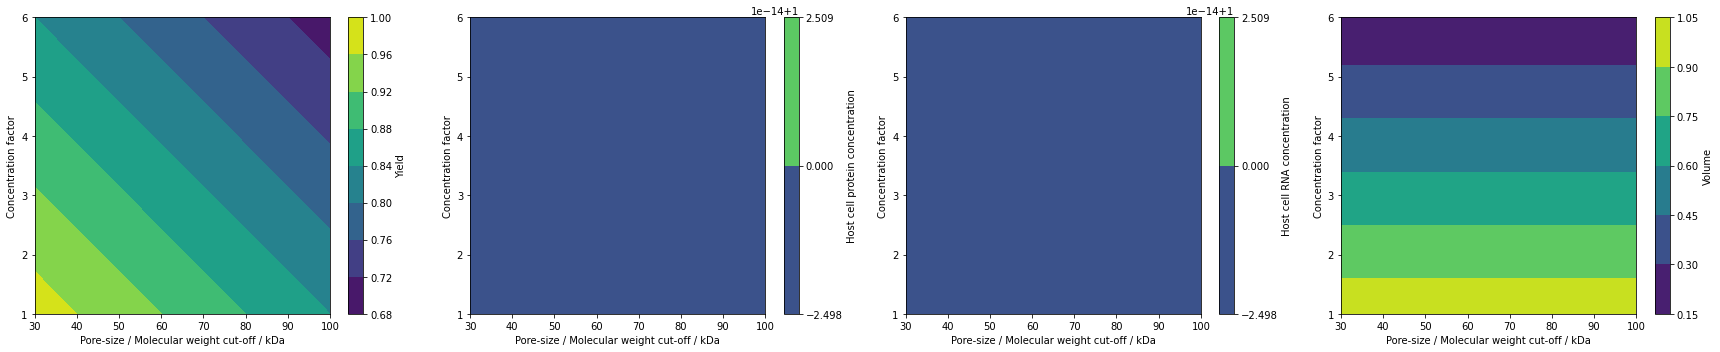

In [64]:
import numpy as np
slider_resolution = 100
product = selected_product.value

process = processes[product][4]
temp = data[product].loc[process]

x_min, x_max = ast.literal_eval(temp['x'][0])
y_min, y_max = ast.literal_eval(temp['y'][0])

process_parameters[process] = {}
process_parameters[process][temp['x_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(x_min, x_max),
    min=x_min,
    max=x_max,
    step = (x_max - x_min) / slider_resolution,
    description=temp['x_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

process_parameters[process][temp['y_name'][0]] = widgets.FloatSlider(
    value=np.random.uniform(y_min, y_max),
    min=y_min,
    max=y_max,
    step = (y_max - y_min) / slider_resolution,
    description=temp['y_name'][0],
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style,
    layout={'width': '500px'}
)

display(Markdown('### Process conditions - ' + process))

display(process_parameters[process][temp['x_name'][0]])
display(process_parameters[process][temp['y_name'][0]])

fig = plt.figure(figsize=(30, 5))

for j, target in enumerate(targets[product]):
    x_range = np.linspace(ast.literal_eval(temp['x'][0])[0], ast.literal_eval(temp['x'][0])[1], 100)
    y_range = np.linspace(ast.literal_eval(temp['y'][0])[0], ast.literal_eval(temp['y'][0])[1], 100)
    coef = ast.literal_eval(temp.loc[target]['coef'])
    scale = temp.loc[target]['scale_xy']
    target_range = temp.loc[target]['target_range']
    if isinstance(target_range, type(np.nan)):
        target_range = None
    else:
        target_range = ast.literal_eval(temp.loc[target]['target_range'])
    x, y, z, _  = response_surface(x_range, y_range, coef, scale=scale, target_range=target_range)

    ax = fig.add_subplot(1, 5, j+1)
    plot_target_contour(x, y, z, xlabel=temp['x_name'][0], ylabel=temp['y_name'][0], zlabel=target, ax=ax)
    # ax.scatter(process_parameters[process][temp['x_name'][0]].value, process_parameters[process][temp['y_name'][0]].value, marker='*', c='r', s=100)
fig.tight_layout()

## Simulate Downstream Process

In [65]:
# Prepare initial values in correct format
product = selected_product.value

initial_conditions_values = {}
for target in targets[product] + ['Product concentration']:
        initial_conditions_values[target] = initial_conditions_widget[target].value

dsp = vr_app_functions.DownstreamProcess(initial_conditions=initial_conditions_values)

initial_conditions_values['Step'] = 'Initial'
results = pd.DataFrame(initial_conditions_values, index=[0])
for process in processes[product]:
    for target in targets[product]:
        temp  = data[product].loc[process]
        x_name, y_name = temp['x_name'][0], temp['y_name'][0]
        dsp.simulate_single_unit_operation(x=process_parameters[process][x_name].value, y=process_parameters[process][y_name].value, design_space=temp, target=target)
    dsp.update_product_concentration()
    step_results = dsp.current_process_conditions
    step_results['Step'] = process
    results = pd.concat([results, pd.DataFrame(step_results, index=[0])], axis=0, ignore_index=True)

results

,Yield,Host cell protein concentration,Host cell RNA concentration,Volume,Product concentration,Step
0,1.000000,7.500000,3.000000,500.000000,1.000000,Initial
1,0.874748,7.500000,3.676752,500.000000,0.874748,AL
2,0.828335,6.373461,4.919349,450.000000,0.920373,DF
3,0.774372,0.318673,1.130685,135.000000,2.868046,aex
4,0.677483,0.031867,0.101771,94.500000,3.584568,hic
5,0.538785,0.031867,0.101771,67.738195,3.976963,ufdf


## Visualize results

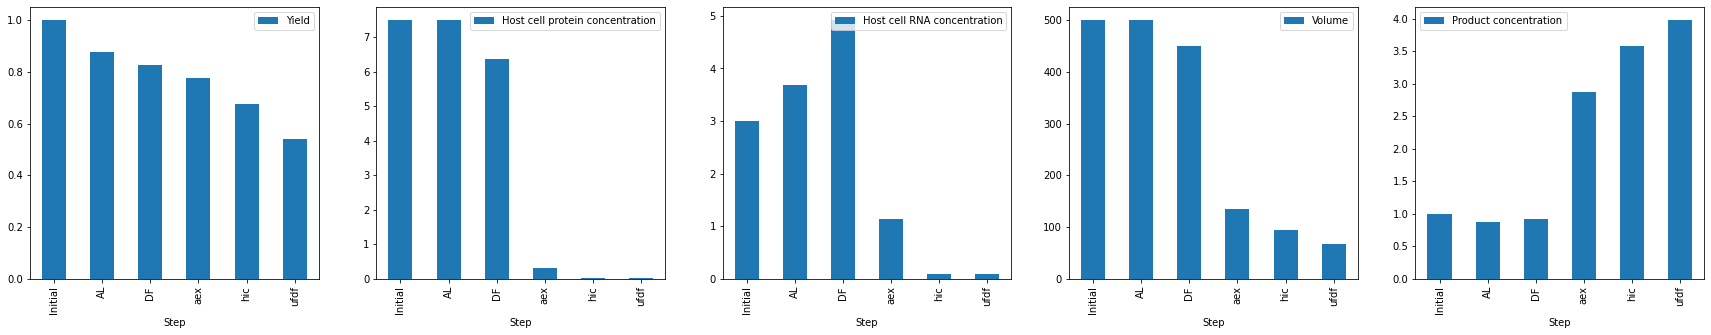

In [66]:
fig = plt.figure(figsize=(30, 5))
for i, col in enumerate(results.iloc[:, :5].columns.to_list()):
    ax = fig.add_subplot(1, 5, i+1)
    results.plot.bar(x='Step', y=col, ax=ax)

## Simulate Multiple Conditions

### Sample Parameter Settings

In [68]:
style = {'description_width': 'initial'}
sampler =widgets.Dropdown(
    options=['LHS', 'DOE'],
    value='DOE',
    description='Sampling Options:',
    disabled=False,
    style=style
)
display(sampler)

Dropdown(description='Sampling Options:', index=1, options=('LHS', 'DOE'), style=DescriptionStyle(description_…

In [69]:
style = {'description_width': 'initial'}
sampling_options = {}


if (sampler.value == 'LHS') | (sampler.value == 'Random'):
    sampling_options = widgets.FloatText(
            value=100,
            description='Number of Samples ' + sampler.value,
            disabled=False,
            style=style
        )
    display(sampling_options)

if (sampler.value == 'DOE'):
    sampling_options = widgets.FloatText(
            value=2,
            description='Number of DoE Levels ' + sampler.value,
            disabled=False,
            style=style
        )
    display(sampling_options)


FloatText(value=100.0, description='Number of Samples LHS', style=DescriptionStyle(description_width='initial'…

Sampling of Type LHS is done. In total, 1000 parameter conditions were generated.


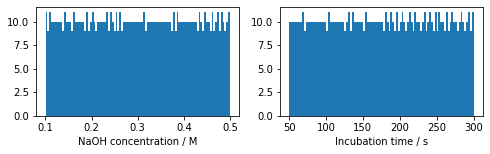

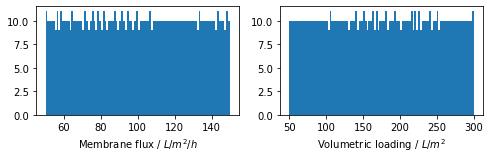

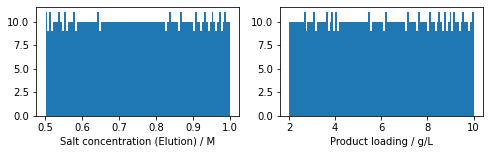

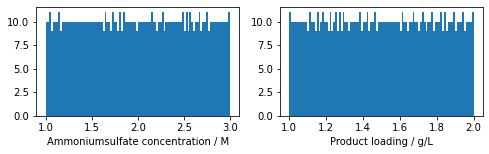

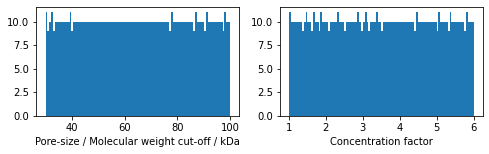

In [71]:
process_data = data[selected_product.value].copy(deep=True)
process_data.index.set_names(['Step', 'Target'], inplace=True)
process_data.reset_index(inplace=True)

if (sampler.value == 'LHS') | (sampler.value == 'Random'):
    samples, n_samples = vr_app_functions.parameter_sampling(process_data, n_samples=sampling_options.value, sampling_type=sampler.value, doe_levels=None)
if (sampler.value == 'DOE'):
    samples, n_samples = vr_app_functions.parameter_sampling(process_data, n_samples=None, sampling_type=sampler.value, doe_levels=sampling_options.value)

print('Sampling of Type {} is done. In total, {} parameter conditions were generated.'.format(sampler.value, n_samples))

for i, process in enumerate(samples.keys()):
    fig = plt.figure(figsize=(8, 2))
    for j, par in enumerate(samples[process].keys()):
        ax = fig.add_subplot(1, 2, j+1)
        ax.hist(samples[process][par], bins=100)
        ax.set_xlabel(par)

### Run Simulation with all Conditions

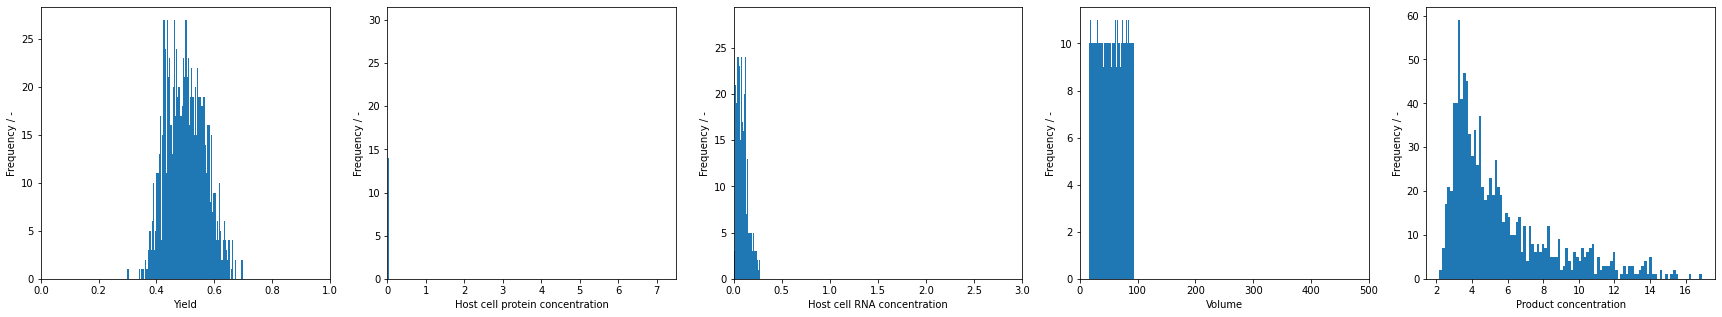

In [72]:
product = selected_product.value


# Prepare initial values in correct format
initial_conditions_values = {}
for target in targets[product] + ['Product concentration']:
        initial_conditions_values[target] = initial_conditions_widget[target].value


results = pd.DataFrame([])
temp_store = {}
for n in range(n_samples):
    dsp = vr_app_functions.DownstreamProcess(initial_conditions=initial_conditions_values.copy())

    initial_conditions_values['Step'] = 'Initial'
    for process in processes[product]:
        for target in targets[product]:
            temp  = data[product].loc[process]
            x_name, y_name = temp['x_name'][0], temp['y_name'][0]
            dsp.simulate_single_unit_operation(x=samples[process][x_name][n], y=samples[process][y_name][n], design_space=temp, target=target)
            temp_store[process + '_' + x_name] = samples[process][x_name][n]
            temp_store[process + '_' + y_name] = samples[process][y_name][n]
        dsp.update_product_concentration()
    results = pd.concat([results, pd.DataFrame({**dsp.current_process_conditions, **temp_store}, index=[0])], axis=0, ignore_index=True)
    del dsp


fig = plt.figure(figsize=(30, 5))
results.replace(np.inf, -1, inplace=True)
for i, col in enumerate(results.iloc[:, :5].columns.to_list()):
    ax = fig.add_subplot(1, 5, i+1)
    col_values = results[col].to_numpy()
    ax.hist(col_values,bins=100)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency / -')
    if col != 'Product concentration':
        ax.set_xlim([0, initial_conditions_values[col]])


### Pareto Plot

In [73]:
style = {'description_width': 'initial'}
xaxis =widgets.Dropdown(
    options=results.columns.to_list() + ['None'],
    value='None',
    description='X-Axis:',
    disabled=False,
    style=style
)
display(xaxis)

yaxis =widgets.Dropdown(
    options=results.columns.to_list() + ['None'],
    value='None',
    description='Y-Axis:',
    disabled=False,
    style=style
)
display(yaxis)



colorby =widgets.Dropdown(
    options=results.columns.to_list() + ['None'],
    value='None',
    description='Coloring:',
    disabled=False,
    style=style
)
display(colorby)

Dropdown(description='X-Axis:', index=16, options=('Yield', 'Host cell protein concentration', 'Host cell RNA …

Dropdown(description='Y-Axis:', index=16, options=('Yield', 'Host cell protein concentration', 'Host cell RNA …

Dropdown(description='Coloring:', index=16, options=('Yield', 'Host cell protein concentration', 'Host cell RN…

C:\Users\hk0197\AppData\Local\Temp\ipykernel_45312\607718407.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(np.round(np.linspace(df[c].min(), df[c].max(), n_ticks), 1))


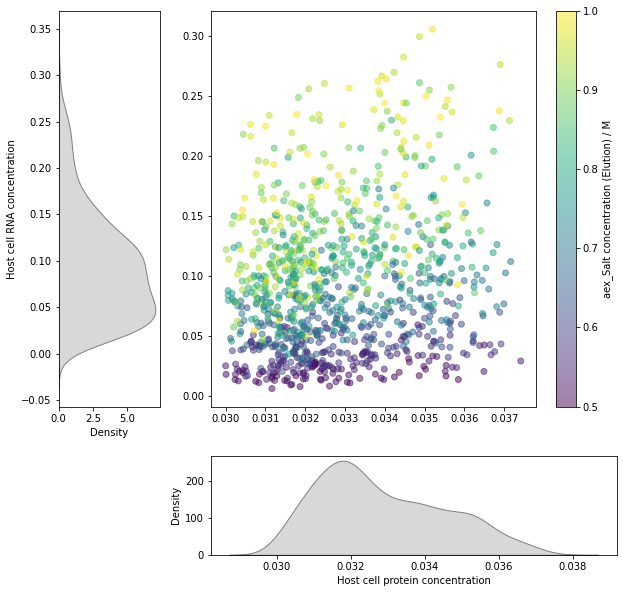

In [79]:
# Generate sample data
def plot_targets(df, x, y, c):
    
    # Create scatter plot
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, width_ratios=[0.2, 0.8], height_ratios=[0.8, 0.2], figsize=(10, 10))
    axes[1][0].set_axis_off()

    if (x == 'None') & (y == 'None'):
        raise ValueError('Please select either one variable for x or y.')
    else:
        if c == 'None':
            colors = 'blue'
        else:
            colors = plt.get_cmap('viridis')((df[c] - df[c].min()) / (df[c].max() - df[c].min()))        

        if x == 'None':
            axes[0][1].scatter(np.zeros(df.shape[0]), df[y].to_numpy(), alpha=0.5, c=colors)
            sns.kdeplot(y=df[y], color='grey', fill=True, alpha=0.3,  ax=axes[0][0])  # Adjusting bandwidth

        if y == 'None':
            axes[0][1].scatter(df[x].to_numpy(), np.zeros(df.shape[0]), alpha=0.5, c=colors)
            sns.kdeplot(x=df[x], color='grey', fill=True, alpha=0.3,  ax=axes[1][1])  # Adjusting bandwidth

        if (x != 'None') & (y != 'None'):
            scatter = axes[0][1].scatter(df[x].to_numpy(), df[y].to_numpy(), alpha=0.5, c=colors)
                
            # Visualize distribution along axes
            sns.kdeplot(x=df[x], color='grey', fill=True, alpha=0.3,  ax=axes[1][1])  # Adjusting bandwidth
            sns.kdeplot(y=df[y], color='grey', fill=True, alpha=0.3,  ax=axes[0][0])  # Adjusting bandwidth
            
            if c != 'None':
                cb = plt.colorbar(scatter, label=c)
                ticks = cb.get_ticks()
                n_ticks = len(ticks)
                cb.set_ticklabels(np.round(np.linspace(df[c].min(), df[c].max(), n_ticks), 1))

    # # Set labels and title
    axes[0][0].set_ylabel(y)
    axes[1][1].set_xlabel(x)

    plt.show()


x, y, c = xaxis.value, yaxis.value, colorby.value

plot_targets(results, x, y, c)



In [ ]:
# results.to_excel('Results/tabelle1.xlsx')